C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster centers:
 [[-2.88395817e-01 -9.95858598e-01  6.28795921e-01  2.00222936e-04
   5.29629222e-01]
 [-2.88395817e-01  6.49091517e-01 -5.36497746e-01 -1.70287040e-01
  -4.43677206e-01]
 [ 3.46745668e+00  3.80106828e-02  8.94979836e-01  1.23461653e+00
   6.94262737e-01]]


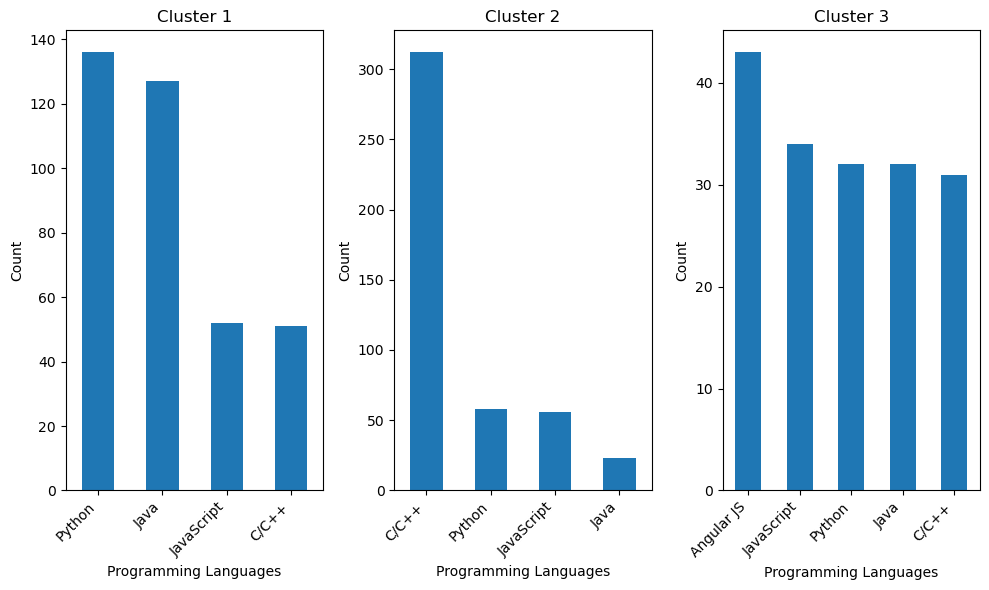

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the CSV data into a DataFrame
df = pd.read_csv('college.csv')

# Drop any rows with missing values if necessary
df = df.dropna()

# Extract the column with programming languages
programming_languages = df['Which Programming Languages are you Proficient in?']

# Use CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(';'))
X = vectorizer.fit_transform(programming_languages)

# Convert to array and normalize the data
X_array = X.toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

# Use K-Means to create clusters
num_clusters = 3  # Change this number based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    languages = cluster_data['Which Programming Languages are you Proficient in?'].str.split(';').explode().value_counts()
    plt.subplot(1, num_clusters, cluster + 1)
    languages.plot(kind='bar')
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('Programming Languages')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
